## Ridge regression
Ridge regression is a regularization technique for linear regression that reduces overfitting and handles multicollinearity by adding an L2 penalty
to the loss function. This penalty shrinks coefficient magnitudes toward zero without setting them exactly to zero. By introducing a small amount of bias, ridge regression significantly reduces variance,resulting in more stable and reliable predictions, particularly in high-dimensional datasets or when predictors are highly correlated.

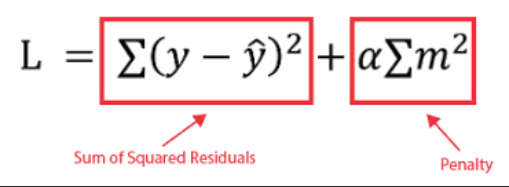

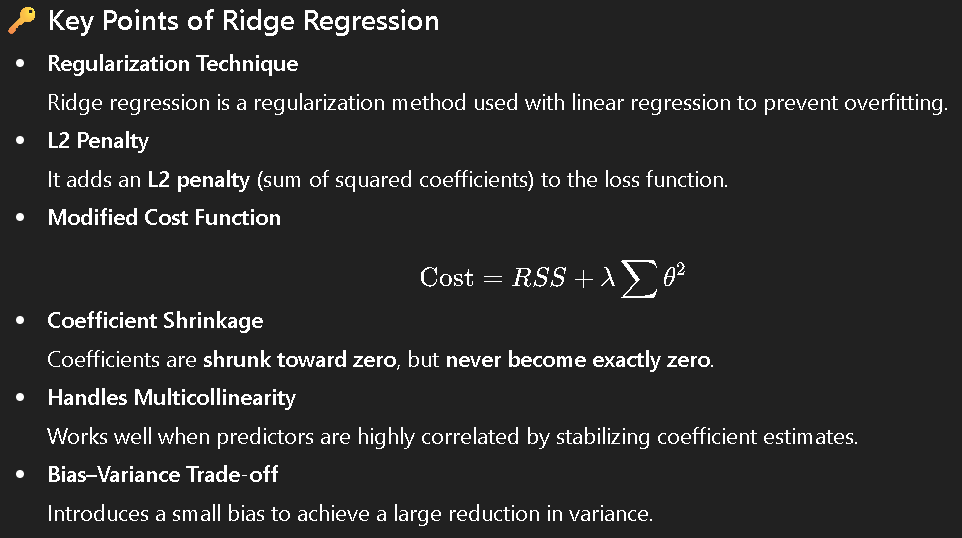

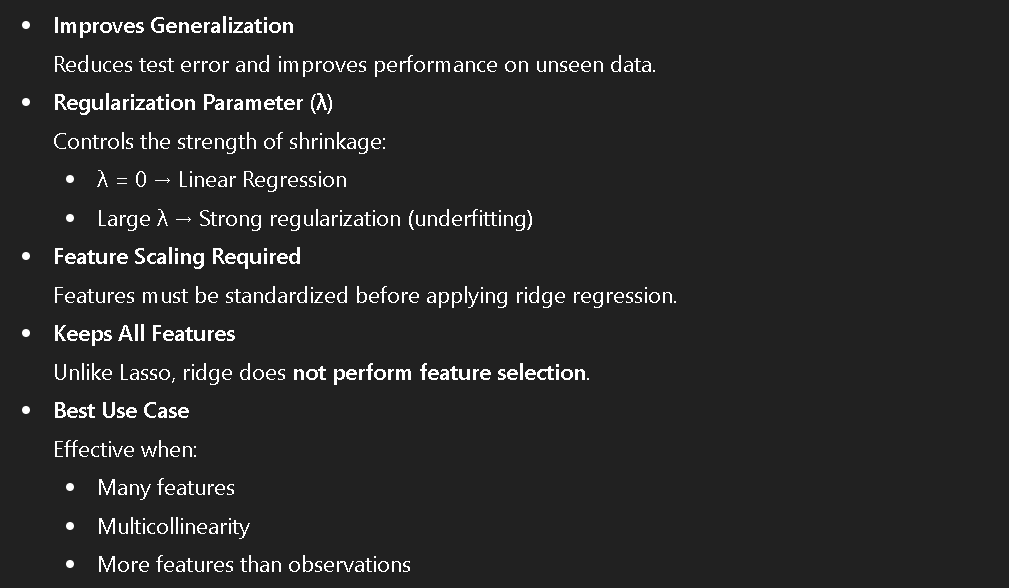
## Key benefits:
## Handles Multicollinearity: 
Stabilizes models where independent variables are highly correlated.
## Reduces Overfitting: 
Prevents the model from becoming too complex and fitting noise in the training data.
## Improves Reliability: 
Shrinks coefficients, making predictions more robust, particularly with high-dimensional data (many features). 
## One-Line Summary
Ridge regression reduces overfitting by shrinking coefficients using L2 regularization, improving model stability and generalization.

In [11]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X, y = make_regression(n_samples=1000,n_features=10,noise=20,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])


In [14]:
ridge_model.fit(X_train, y_train)


,steps,"[('scaler', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None


In [15]:
y_pred = ridge_model.predict(X_test)


In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


MSE : 380.212477018492
RMSE: 19.499037848532218
R²  : 0.9774181138114046


In [17]:
coefficients = ridge_model.named_steps['ridge'].coef_

coef_df = pd.DataFrame({
    'Feature': [f'X{i}' for i in range(X.shape[1])],
    'Coefficient': coefficients
})

print(coef_df)


  Feature  Coefficient
0      X0    34.350796
1      X1    31.525497
2      X2    29.219571
3      X3    75.999830
4      X4     6.826670
5      X5     9.218389
6      X6    71.859747
7      X7     8.646760
8      X8     4.565062
9      X9    60.676583


In [18]:
alphas = [0, 0.01, 0.1, 1, 10, 100]

for a in alphas:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=a))
    ])
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Alpha={a:<6} → R² = {score:.4f}")


Alpha=0      → R² = 0.9774
Alpha=0.01   → R² = 0.9774
Alpha=0.1    → R² = 0.9774
Alpha=1      → R² = 0.9774
Alpha=10     → R² = 0.9774
Alpha=100    → R² = 0.9655


In [19]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.1, 1.0, 10.0, 100.0]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

print("Best alpha:", ridge_cv.alpha_)

y_pred = ridge_cv.predict(X_test)


Best alpha: 0.1
